## Observations and Insights 

* There are 249 mice in total with 50.6% male and 49.4% female. It would be interesting to see if the sex of the mouse was correlated to effectiveness of the drug regimen.
* Capomulin and Ramicane have the most counts out of all the drugs present in the study. They are also the most effective drug by having the smallest tumor volume range compare to the others
* The tumor volume is reduced after 45 days of study. It would be interesting to see if the volume keeps reducing beyond that 45 days.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].count()

print(f"The number mice is {number_of_mice}")

The number mice is 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice =  combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID'])]

all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates('Mouse ID')

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data['Mouse ID'].count()

print(f"The number mice after cleaning teh DataFrame is {number_of_mice_clean}")

The number mice after cleaning teh DataFrame is 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({'Mean': mean, 
                              'Median': median, 
                              'Variance': variance, 
                              'Standard Deviation': std_dv, 
                              'SEM': sem})

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_single_line = combined_data[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

summary_single_line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Count')

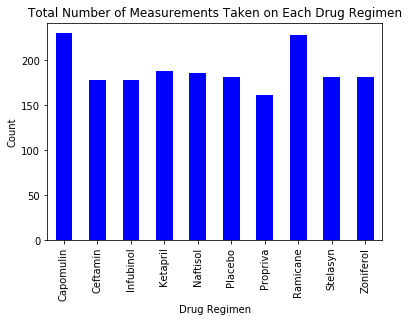

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_regimen = combined_data.groupby('Drug Regimen')
count_regimen_df = pd.DataFrame(count_regimen['Drug Regimen'].count())

pandas_bar_graph = count_regimen_df.plot(kind='bar',
                                         color='blue',
                                         title='Total Number of Measurements Taken on Each Drug Regimen',
                                         legend=False)
pandas_bar_graph.set_ylabel('Count')


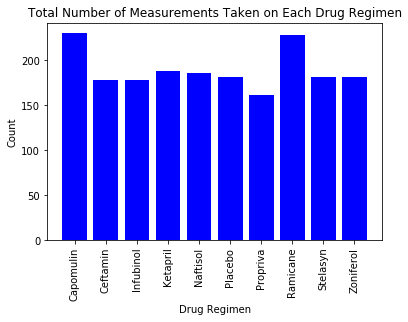

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(count_regimen_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, count_regimen_df['Drug Regimen'], color='blue')
plt.xticks(tick_locations, list(count_regimen_df.index), rotation='vertical')
plt.title('Total Number of Measurements Taken on Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.show()


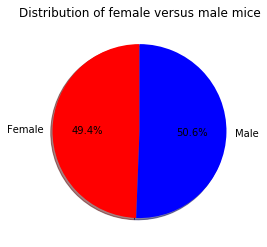

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_gender = combined_data.groupby('Sex')
count_gender_df = pd.DataFrame(count_gender['Sex'].count())

count_gender_df.plot(kind='pie', y='Sex', title='Distribution of female versus male mice', legend =False,
                     autopct='%1.1f%%', shadow=True, colors =['red','blue'],startangle=90 )
plt.ylabel("")
plt.show()

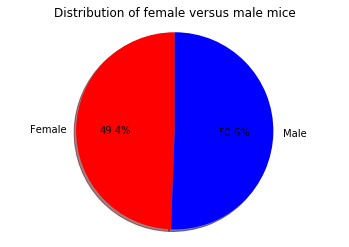

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(count_gender_df.index.values)
gender_counts = count_gender_df['Sex']

plt.pie(gender_counts, labels=genders,colors =['red','blue'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of female versus male mice')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
boxplot_data = combined_data.groupby(['Mouse ID'])
last_timepoint = boxplot_data['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = last_timepoint[['Mouse ID','Timepoint']].merge(combined_data,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = merged_data.loc[merged_data['Drug Regimen'] == x]['Tumor Volume (mm3)']

    # add subset 
    tumor_vol.append(drug_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"{x} values below {lower_bound} could be outliers.")
    print(f"{x} values above {upper_bound} could be outliers.")
    outliers = []
    for i in drug_data:
        if i < upper_bound and i > lower_bound:
            next
        else:
            outliers.append(i)
    if outliers == []:
        print(f"No outliers are in {x} DataFrame.")
    else:
        print(f"{outliers} is/are the outliers in {x} DataFrame.")
    print('-------------------------------------------------------------------')

Capomulin values below 20.70456164999999 could be outliers.
Capomulin values above 51.83201549 could be outliers.
No outliers are in Capomulin DataFrame.
-------------------------------------------------------------------
Ramicane values below 17.912664470000003 could be outliers.
Ramicane values above 54.30681135 could be outliers.
No outliers are in Ramicane DataFrame.
-------------------------------------------------------------------
Infubinol values below 36.83290494999999 could be outliers.
Infubinol values above 82.74144559000001 could be outliers.
[36.321345799999996] is/are the outliers in Infubinol DataFrame.
-------------------------------------------------------------------
Ceftamin values below 25.355449580000002 could be outliers.
Ceftamin values above 87.66645829999999 could be outliers.
No outliers are in Ceftamin DataFrame.
-------------------------------------------------------------------


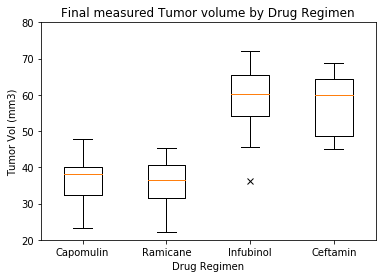

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final measured Tumor volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Vol (mm3)')
ax1.boxplot(tumor_vol, notch=0, sym='x')
plt.xticks([1,2,3,4], drug_list)
plt.ylim(20, 80)
plt.show()

## Line and Scatter Plots

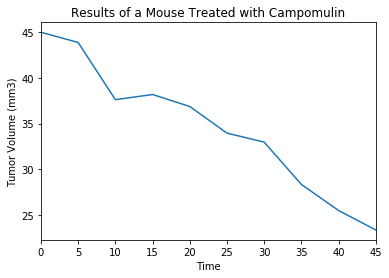

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data.reset_index()
capomulin_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == 's185']

plt.title('Results of a Mouse Treated with Campomulin')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.xlim(0, 45)
plt.show()

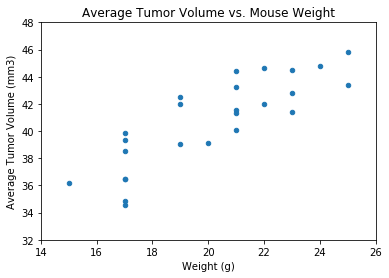

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_data = capomulin_data.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
avg_weight_data = pd.DataFrame(weight_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()
#avg_weight_data = weight_data.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_weight_data.plot(kind='scatter', 
                     x='Weight (g)', 
                     y='Tumor Volume (mm3)',  
                     title='Average Tumor Volume vs. Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.ylim(32, 48)
plt.xlim(14, 26)
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
mouse_weight = avg_weight_data.loc[:,'Weight (g)']
avg_tumor_vol = avg_weight_data.loc[:,'Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {correlation[0]}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.8419363424694717


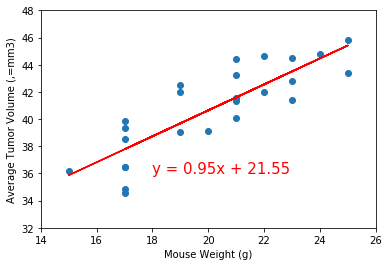

In [19]:
# Create the linear regression model 
from scipy.stats import linregress
x_values = avg_weight_data['Weight (g)']
y_values = avg_weight_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (,=mm3)')
plt.ylim(32, 48)
plt.xlim(14, 26)
plt.show()